In [162]:
# Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initial exploration

## Import data from csv

In [163]:
books = pd.read_csv("datasets/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


## Gate info

In [164]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [165]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


## A closer look at categorical columns

In [166]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64

## Visualizing numerical data

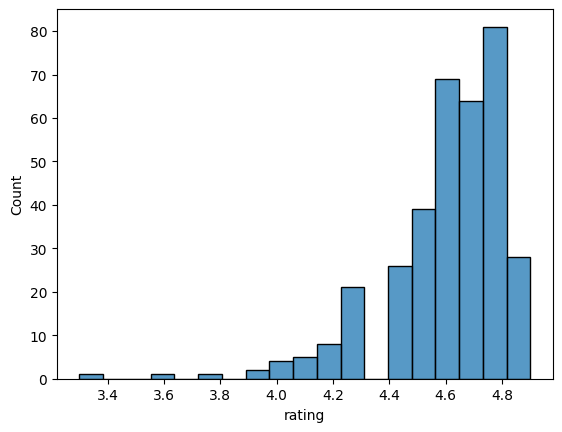

In [167]:
sns.histplot(data=books, x="rating")
plt.show()

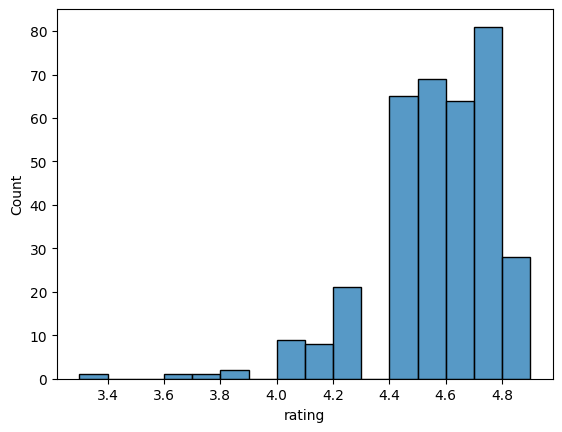

In [168]:
#adjusting bin width
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()

# Data validation

## Validating data types

In [169]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [170]:
# updating data types
books["year"] = books["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

Note:  The most commonly used data types in Pandas are:

- int: integer values, e.g., 1, 2, 3, etc.
- float: floating-point values, e.g., 1.0, 2.0, 3.0, etc.
- bool: boolean values, e.g., True or False.
- datetime64: date and time values, e.g., 2021-09-01 12:00:00.
- timedelta: time duration values, e.g., 1 day, 2 hours, 30 minutes, etc.
- object: string values, which can contain any data type, e.g., 'apple', '123', etc.
- str: string values, e.g., 'apple', 'banana', 'cherry'.
- dict: dictionaries, which are collections of key-value pairs, e.g., {'name': 'John', 'age': 30}.
- list: lists, which are ordered collections of values, e.g., [1, 2, 3].


## Validating categorical data

In [171]:
books["genre"].isin(["Fiction","Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [172]:
# is not in..
~books["genre"].isin(["Fiction","Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [173]:
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


## Validating numerical data

In [174]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [175]:
books["year"].min(), books["year"].max()

(2009, 2019)

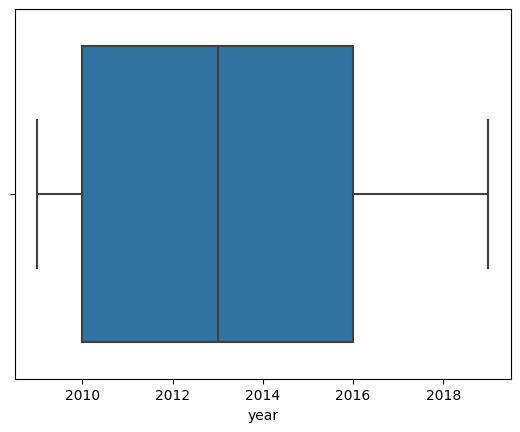

In [176]:
sns.boxplot(data=books, x="year")
plt.show()

<AxesSubplot: xlabel='year', ylabel='genre'>

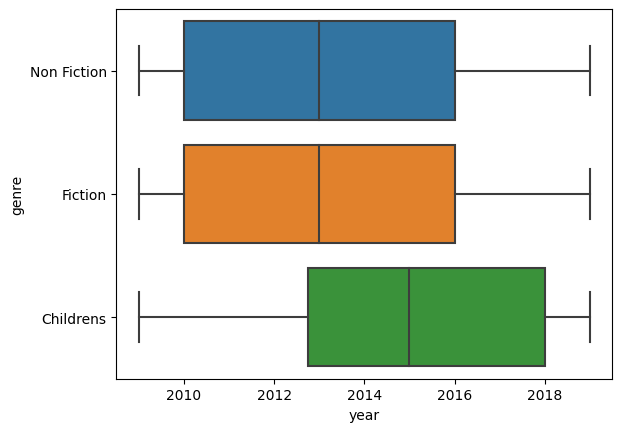

In [177]:
sns.boxplot(data=books, x="year", y="genre")

# Data summarization

## Exploring groups of data

In [178]:
books.groupby("genre").mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


## Aggregating functions

Some of the most commonly used aggregation functions in Pandas are:
- mean(): calculates the mean of each column or row.
- sum(): calculates the sum of each column or row.
- min(): finds the minimum value in each column or row.
- max(): finds the maximum value in each column or row.
- count(): counts the number of non-missing values in each column or row.
- std(): calculates the standard deviation of each column or row.
- var(): calculates the variance of each column or row.
- describe(): calculates several descriptive statistics for each column, including the mean, standard deviation, minimum, and maximum values.
These aggregation functions can be applied to a DataFrame using the .agg() method, which allows you to specify the function(s) to apply and the axis to apply them along.

In [179]:
#Aggregating ungrouped data
books.agg(["mean","std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [180]:
# Specifying aggregations for columns
books.agg({"rating": ["mean","std"],"year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [181]:
# Named summary columns
books.groupby("genre").agg(mean_rating=("rating","mean"),
                           std_rating=("rating","std"),
                           median_year=("year","median"))

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


## Visualizing categorical summaries

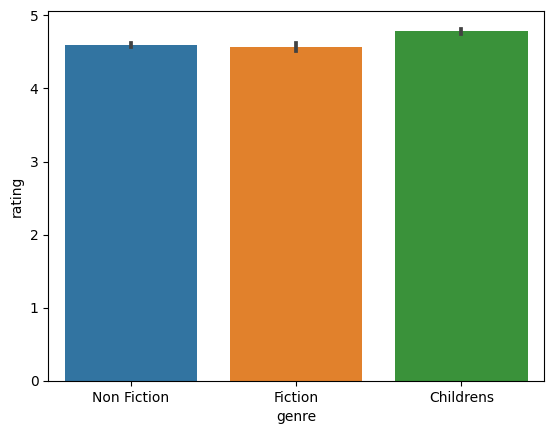

In [182]:
sns.barplot(data=books, x="genre", y="rating")
plt.show()

# Adressing missing data

In [183]:
salaries = pd.read_csv("datasets/ds_salaries_clean.csv")
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [184]:
# Checking for missing values
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

## Strategies for addressing missing data

Drop missing values
- 5% or less of total values
Impute mean, median, mode
- Depends on distribution and context
Impute by sub-group
- Different experience levels have different median salary

## Dropping missing values

In [185]:
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [186]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')


In [187]:
salaries.dropna(subset=cols_to_drop, inplace=True)

## Imputing a summary statistic

In [188]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


In [189]:
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

In [190]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


## Imputing by sub-group

In [191]:
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


In [192]:
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

# Converting and analyzing categorical data

In [193]:
# Previewing the data
print(salaries.select_dtypes("object").head())

                  Designation Experience  ... Employee_Location Company_Size
0              Data Scientist        Mid  ...                DE            L
1  Machine Learning Scientist     Senior  ...                JP            S
2           Big Data Engineer     Senior  ...                GB            M
3        Product Data Analyst        Mid  ...                HN            S
4   Machine Learning Engineer     Senior  ...                US            L

[5 rows x 5 columns]


In [194]:
# job titles
print(salaries["Designation"].value_counts())

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [195]:
print(salaries["Designation"].nunique())

50


## Extracting value from categories

In [196]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

## Finding multiple phrases in strings

In [197]:
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [198]:
job_categories = ["Data Science","Data Analytics","Data Engineering","Machine Learning","Managerial","Consultant"]

In [199]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [200]:
conditions = [
(salaries["Designation"].str.contains(data_science)),
(salaries["Designation"].str.contains(data_analyst)),
(salaries["Designation"].str.contains(data_engineer)),
(salaries["Designation"].str.contains(ml_engineer)),
(salaries["Designation"].str.contains(manager)),
(salaries["Designation"].str.contains(consultant))
]

In [201]:
salaries["Job_Category"] = np.select(conditions,job_categories,default="Other")

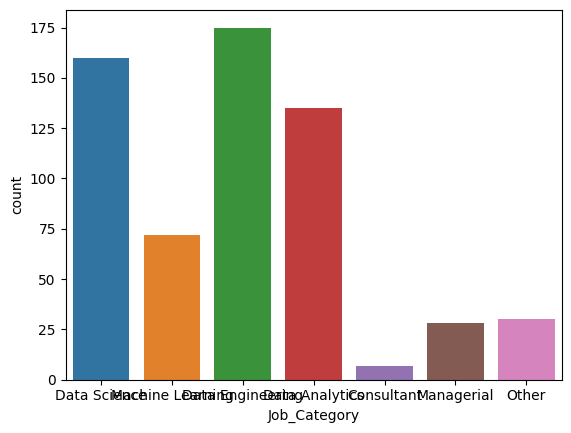

In [202]:
# Visualizing job category frequency
sns.countplot(data=salaries, x="Job_Category")
plt.show()

# Working with numeric data